In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# загрузка датасета
df = pd.read_csv('../hw-datasets/S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [9]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [10]:
# кол-во пропусков
df.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [11]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [ ]:
# кол-во дубликатов в датафрейме
df.duplicated().sum()

np.int64(1)

In [15]:
# посмотрим что за дубликаты
duplicates = df[df.duplicated()]
duplicates

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [17]:
# удаление дубликатов: было 41 
print(len(df))
df = df.drop_duplicates()
# стало 41 - 1 = 40 !осторожно вышмат!
print(len(df))

40
40


In [ ]:
# структура датасета выглядит так:
# пользователь, возраст, страна, покупки?, доход 
# буду проверять: 0 <= возраст < 100, 0 <= доход 
# проверим минимальный и максимальный возраст, может быть данные правильные)
print("age:",df['age'].min(), df['age'].max())
# записи где возраст больше 100
not_real_age = df[df['age'] > 100]
# получилась 1 запись
print(len(not_real_age))
# проверка доходов
print("revenue:", df['revenue'].min(), df['revenue'].max())
# все в пределах нормы
# проверка покупок
print("purchases:", df['purchases'].min(), df['purchases'].max())
# кол-во отрицательных и дробных покупок
not_real_purchases = df[~((df['purchases'] > 0) & (df['purchases'] % 1 == 0))]
print(len(not_real_purchases))



age: 5.0 120.0
1
revenue: 0 2475
purchases: -1 11
4


In [ ]:
# почистим датасет
df_clean = df[
    (df['age'] >= 0) &
    (df['age'] <= 100) &
    (df['purchases'] >= 0) &
    (df['purchases'] % 1 == 0) 
].copy()

print(len(df))
print(len(df_clean))


40
37


In [31]:
# посмотрим какие страны имеются
df_clean['country'].value_counts()


country
RU    12
FR    11
US     7
DE     5
CN     2
Name: count, dtype: int64

In [30]:
# агрегации
df_clean.groupby('country')['revenue'].mean()

country
CN    1054.000000
DE    1475.400000
FR     666.000000
RU     813.333333
US     547.000000
Name: revenue, dtype: float64

In [32]:
df_clean.groupby('country').agg({
    'revenue' : 'mean',
    'purchases' : 'mean',
    'age' : ['min', 'max', 'mean']
})

revenue purchases   age                 
                mean      mean   min   max       mean
country                                              
CN       1054.000000  4.500000  20.0  28.0  24.000000
DE       1475.400000  6.600000  18.0  52.0  34.600000
FR        666.000000  4.727273  22.0  57.0  39.545455
RU        813.333333  4.583333   5.0  54.0  30.583333
US        547.000000  4.000000  23.0  51.0  36.714286

In [39]:
# bins
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 18, 30, 100], labels=['Школьник', 'Студент', 'Выпускник'])
df_clean.head()

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,Студент
1,2,24.0,RU,5,1115,Студент
2,3,52.0,FR,7,399,Выпускник
3,4,31.0,RU,6,654,Выпускник
6,7,46.0,RU,0,0,Выпускник


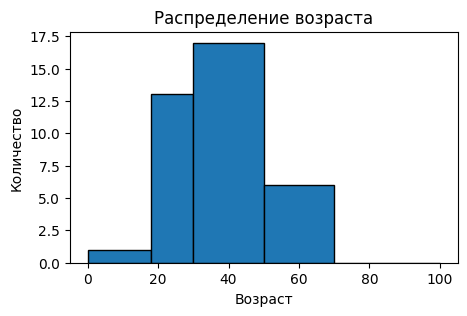

In [49]:
plt.figure(figsize=(5, 3))
plt.hist(df_clean['age'], bins=[0, 18, 30, 50, 70, 100], edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.savefig('figures/age_histogram.png')
plt.show()

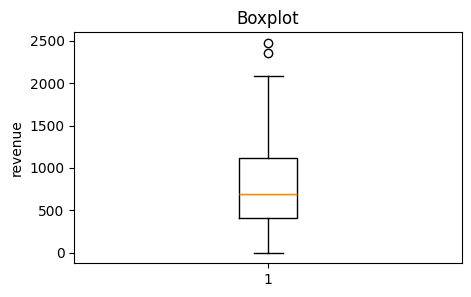

In [57]:
plt.figure(figsize=(5,3))
plt.boxplot(df_clean['revenue'])
plt.title('Boxplot')
plt.ylabel('revenue')
plt.savefig('figures/revenue_boxplot.png')
plt.show()

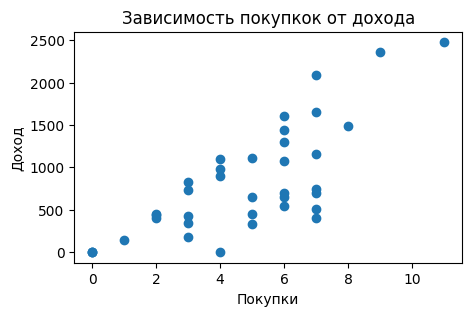

In [56]:
plt.figure(figsize=(5, 3))
plt.scatter(df_clean['purchases'], df_clean['revenue'])
plt.xlabel('Покупки')
plt.ylabel('Доход')
plt.title('Зависимость покупкок от дохода')
plt.savefig('figures/revenue_purchases_scatter.png')
plt.show()